In [5]:
library(ISLR)
library(dplyr)

## Conceptual
1. For each of parts (a) through (d) indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method.
    1. The sample size *n* is extremely large and the number of predictors *p* is small.
        * **Performance would be better with a flexible method. It would better fit the large sample size.**
    2. The number of predictors *p* is extremely large and the number of observations *n* is small.
        * **An inflexible method would be better here. A flexible method would overfit due to the small number of observations.**
    3. The relationship between the predictors and response is highly non-linear.
        * **A flexible method would be better here - having more degrees of freedom could better fit the non-linear nature of the data**
     4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high.
        * **An inflexible model would be better. The high variance of the data could result in an overfitted flexible model.**


2. Explain whether each scenario is a classification or regression problem, and indicate whether we are most interested in inference or prediction.
    1. We collect a set of data on the top 500 firms in the US. We are interested in understanding which factors affect CEO salary.
        * **Regression. Inference (we're concerned about the effect of factors)**
    2. We are considering launching a new product and wish to know whether it will be a *success* or *failure*.
        * **Classification. Prediction**
    3. We are interested in predicting the % change in the USD/Euro exchange rate in relation to the weekly changes in the world stock markets.
        * **Regression. Prediction**


3. Bias-Variance decomposition
     1. Sketch typical (squared) bias, variance, training error, test error, and Bayes (irreducible) error curves, as we go from less flexible methods to more flexible approaches.
    2. Explain why each of the five curves has the shape displayed in part a)
        * **(squared) bias - decreases monotonically because increases in flexibility yield a closer fit**
        * **variance - increases monotonically because increases in flexibility yield overfit**
        * **training error - decreases monotonically because increases in flexibility yield a closer fit**
        * **test error - concave up curve because increase in flexibility yields a closer fit before it overfits**
        * **Bayes (irreducible) error - defines the lower limit, the test error is bounded below by the irreducible error due to variance in the error (epsilon) in the output values (0 <= value). When the training error is lower than the irreducible error, overfitting has taken place. The Bayes error rate is defined for classification problems and is determined by the ratio of data points which lie at the 'wrong' side of the decision boundary, (0 <= value < 1).**


5. What are the advantages and disadvantages of a very flexible vs. less flexible approach for regression or classification. Under what circumstances might a more flexible approach be preferred to a less flexible approach. When might a less flexible approach be preferred?
    * **More flexible approach: Good for non-linear data, decreases bias. Disadvantages: requires estimating a greater number of parameters - can lead to overfitting the data, increasing variance.**
    * **A more flexible approach would be preferred when we're concerned about prediction and non interpretability. The opposite goes for a less flexible approach.**

6. Describe the difference between a parametric and non-parametric statistical learning approach. What are the advantages/disadvantages of a parametric approach to regression or classification vs. a non-parametric approach?
    * **A parametric approach simplifies estimating f down to estimating a set of parameters that assume the form of f**
    * **A non-parametric approach assumes to functional form for f and requires a large number of observations to accuractely estimate f**
    * **The advantage of a parametric approach is that it simplifies modeling f to a few parameters and requires less observations, compared to non-parametric approaches**
    * **The disadvantages of a parametric approach is that it can potentially inaccurately estimate f is the form of f assumed is incorrected or overfitted.**

7. The table below provides the training data of 6 observations, three predictors, and one response variable

|  X1 | X2  | X3  | Y | 
|---|---|---| --- |
|  0 | 3  | 0  | Red |
|  2 | 0  | 0  | Red |
|  0 | 1  | 3  | Red |
|  0 | 1  | 2  | Green |
|  -1 | 0  | 1  | Green |
|  1 | 1  | 1  | Red |

Suppose we wish to use this data set to make a prediction for $Y$ when $X_1 = X_2 = X_3 = 0$

* Compute the Euclidean distance between each observation and the test point, $X_1 = X_2 = X_3 = 0$

|  X1 | X2  | X3  | Distance(0, 0, 0) | Y | 
|---|---|---| --- | --- |
|  0 | 3  | 0  | 3 |  Red |
|  2 | 0  | 0  | 2 | Red |
|  0 | 1  | 3  | sqrt(10) ~3.2 | Red |
|  0 | 1  | 2  | sqrt(5) ~ 2.2 | Green |
|  -1 | 0  | 1 | sqrt(2) ~ 1.4 | Green |
|  1 | 1  | 1  | sqrt(3) ~ 1.7 | Red |

* What's our prediction with $K = 1$? Why?
    * **Green. Observation #5 is the closest neighbor for K = 1.**
* What's our prediction with $K = 3$? Why?
    * **Red. Observations #2, 5, 6 are the closest neighbors for K = 3. 2 is Red, 5 is Green, and 6 is Red.**
* If the Bayes decision boundary in this problem is highly non-linear, would we expect the *best* value for $K$ to be large or small? Why?
    * **Small. A small $K$ leads to flexible, non-linear decision boundaries. A large $K$ would give us a more linear boundary because it takes more points into consideration.**


## Applied

8. We'll be looking at the `College` data set

Read in the data

In [9]:
library(ISLR)
college <- College

Look at the data using the `fix()` function. We really won't need the first column, it's just the name of the university, so remove it.

In [10]:
fix(college)

Now we'll do some EDA

Use the `summary()` function to summarizes the features

In [11]:
summary(college)

 Private        Apps           Accept          Enroll       Top10perc    
 No :212   Min.   :   81   Min.   :   72   Min.   :  35   Min.   : 1.00  
 Yes:565   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242   1st Qu.:15.00  
           Median : 1558   Median : 1110   Median : 434   Median :23.00  
           Mean   : 3002   Mean   : 2019   Mean   : 780   Mean   :27.56  
           3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902   3rd Qu.:35.00  
           Max.   :48094   Max.   :26330   Max.   :6392   Max.   :96.00  
   Top25perc      F.Undergrad     P.Undergrad         Outstate    
 Min.   :  9.0   Min.   :  139   Min.   :    1.0   Min.   : 2340  
 1st Qu.: 41.0   1st Qu.:  992   1st Qu.:   95.0   1st Qu.: 7320  
 Median : 54.0   Median : 1707   Median :  353.0   Median : 9990  
 Mean   : 55.8   Mean   : 3700   Mean   :  855.3   Mean   :10441  
 3rd Qu.: 69.0   3rd Qu.: 4005   3rd Qu.:  967.0   3rd Qu.:12925  
 Max.   :100.0   Max.   :31643   Max.   :21836.0   Max.   :21700  
   Room.Board

Use `pairs()` to produce a scatterplot of the first 10 columns of the data

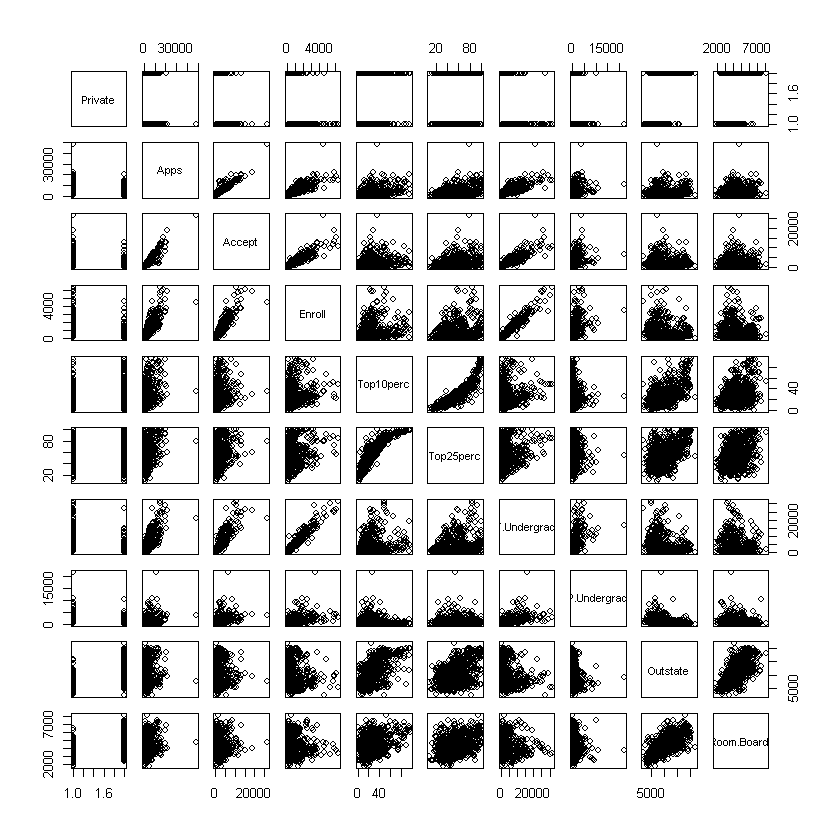

In [12]:
pairs(college[, 1:10])

Use the `plot()` function to produce side-by-side boxplots of `Outstate` vs. `Private`

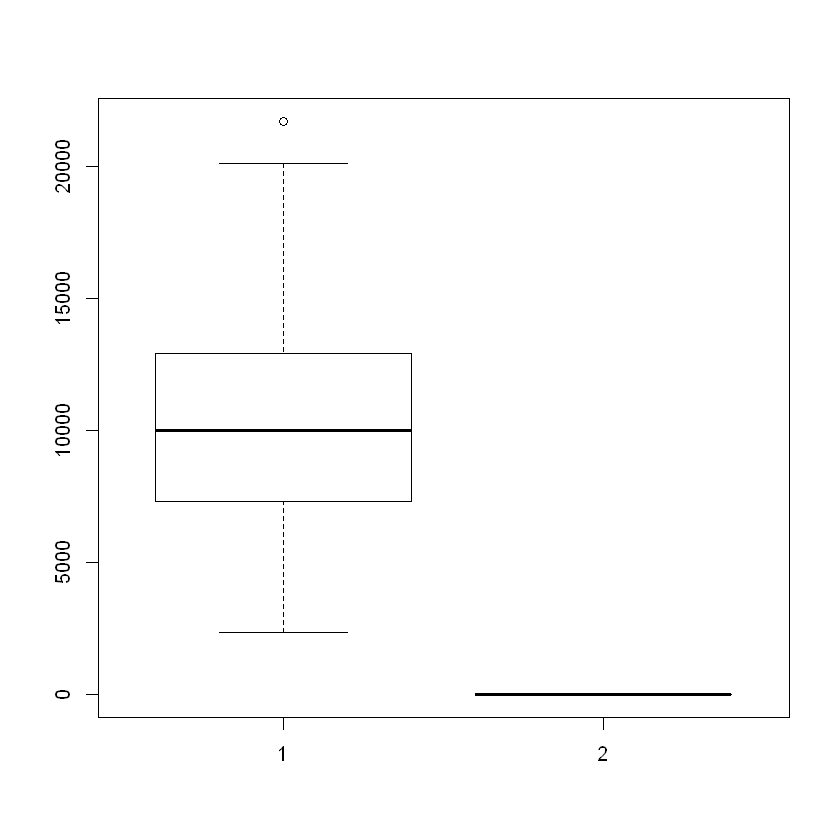

In [13]:
boxplot(college$Outstate, college$Private)

Create a new qualitative variable, called `Elite`, by binning `Top10perc` variable. We are going to be dividing universities into two groups based on whether or not the proportion of students coming from the top 10% of their highschool classes exceeds 50%.

In [14]:
Elite = rep("No", nrow(college))
Elite[college$Top10perc > 50] = "Yes"
Elite = as.factor(Elite)
college = data.frame(college, Elite)

Again, run `summary()` and then plot `Outstate` vs. `Elite`

 Private        Apps           Accept          Enroll       Top10perc    
 No :212   Min.   :   81   Min.   :   72   Min.   :  35   Min.   : 1.00  
 Yes:565   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242   1st Qu.:15.00  
           Median : 1558   Median : 1110   Median : 434   Median :23.00  
           Mean   : 3002   Mean   : 2019   Mean   : 780   Mean   :27.56  
           3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902   3rd Qu.:35.00  
           Max.   :48094   Max.   :26330   Max.   :6392   Max.   :96.00  
   Top25perc      F.Undergrad     P.Undergrad         Outstate    
 Min.   :  9.0   Min.   :  139   Min.   :    1.0   Min.   : 2340  
 1st Qu.: 41.0   1st Qu.:  992   1st Qu.:   95.0   1st Qu.: 7320  
 Median : 54.0   Median : 1707   Median :  353.0   Median : 9990  
 Mean   : 55.8   Mean   : 3700   Mean   :  855.3   Mean   :10441  
 3rd Qu.: 69.0   3rd Qu.: 4005   3rd Qu.:  967.0   3rd Qu.:12925  
 Max.   :100.0   Max.   :31643   Max.   :21836.0   Max.   :21700  
   Room.Board

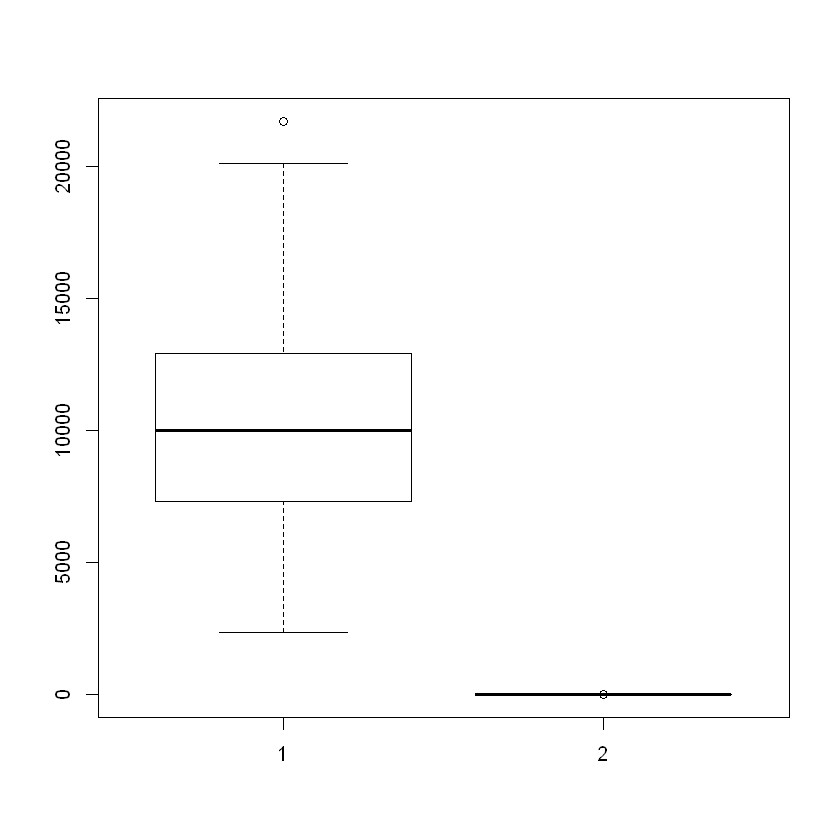

In [15]:
summary(college)
boxplot(college$Outstate, college$Elite)

Use `hist()` to produce some histograms with differing numbers of bins for a few of the quantitative variables.

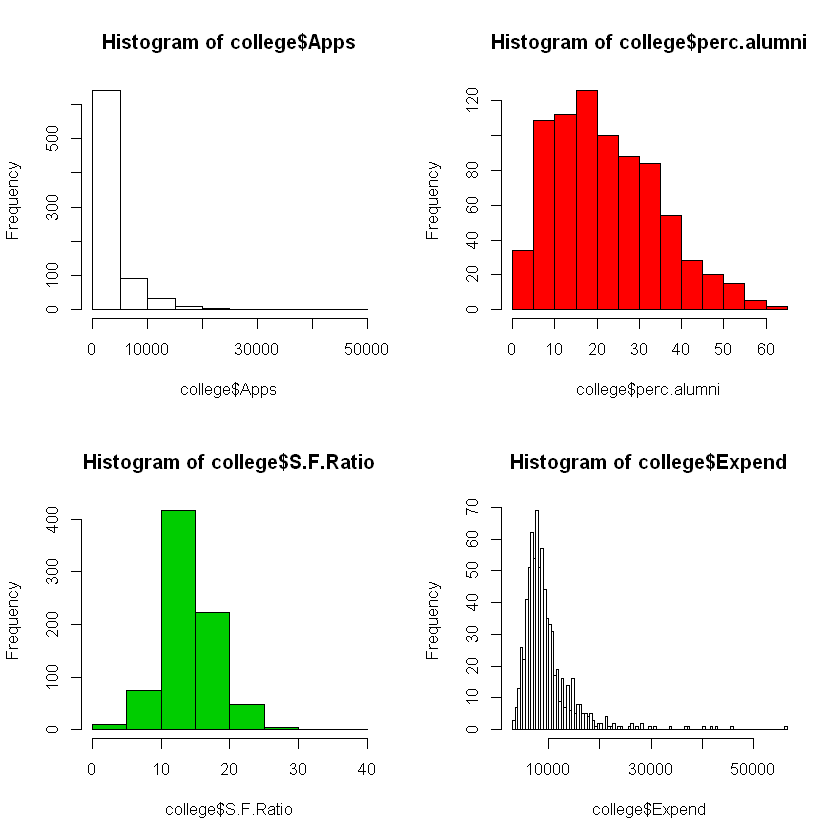

In [16]:
par(mfrow=c(2,2))
hist(college$Apps)
hist(college$perc.alumni, col=2)
hist(college$S.F.Ratio, col=3, breaks=10)
hist(college$Expend, breaks=100)

9. Next, we'll look at the `Auto` data set. First, remove missing numbers.

In [17]:
auto <- Auto
library(dplyr)
auto = na.omit(auto)

Which of the predictors are quantitative and which are qualitative?

In [19]:
head(auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500


quantitative: mpg, cylinders, displacement, horsepower, weight, acceleration, year
qualitative: name, origin

What is the range of each quantitative predictor? Use `range()` for this. What is the mean and stdv?

In [24]:
sapply(auto[, 1:7], range)
sapply(auto[, 1:7], mean)
sapply(auto[, 1:7], sd)

mpg,cylinders,displacement,horsepower,weight,acceleration,year
9.0,3,68,46,1613,8.0,70
46.6,8,455,230,5140,24.8,82


mpg    cylinders displacement   horsepower       weight acceleration 
   23.445918     5.471939   194.411990   104.469388  2977.584184    15.541327 
        year 
   75.979592

mpg    cylinders displacement   horsepower       weight acceleration 
    7.805007     1.705783   104.644004    38.491160   849.402560     2.758864 
        year 
    3.683737

mpg      cylinders displacement horsepower weight   acceleration year    
[1,] 9190.8   2145      76209.5      40952      1167213  6092.2       29784   
[2,] 23.44592 5.471939  194.412      104.4694   2977.584 15.54133     75.97959
[3,] 7.805007 1.705783  104.644      38.49116   849.4026 2.758864     3.683737

Remove the 10th through 85th element of the data - recalc the mean and sd

In [26]:
newAuto = auto[-(10:85), ]
dim(newAuto) == dim(auto) - c(76,0)
newAuto[9,] == auto[9,]
newAuto[10,] == auto[86,]

sapply(newAuto[, 1:7], mean)
sapply(newAuto[, 1:7], sd)

[1] TRUE TRUE

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
9,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
87,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


mpg    cylinders displacement   horsepower       weight acceleration 
   24.404430     5.373418   187.240506   100.721519  2935.971519    15.726899 
        year 
   77.145570

mpg    cylinders displacement   horsepower       weight acceleration 
    7.867283     1.654179    99.678367    35.708853   811.300208     2.693721 
        year 
    3.106217

Investigate the full data set

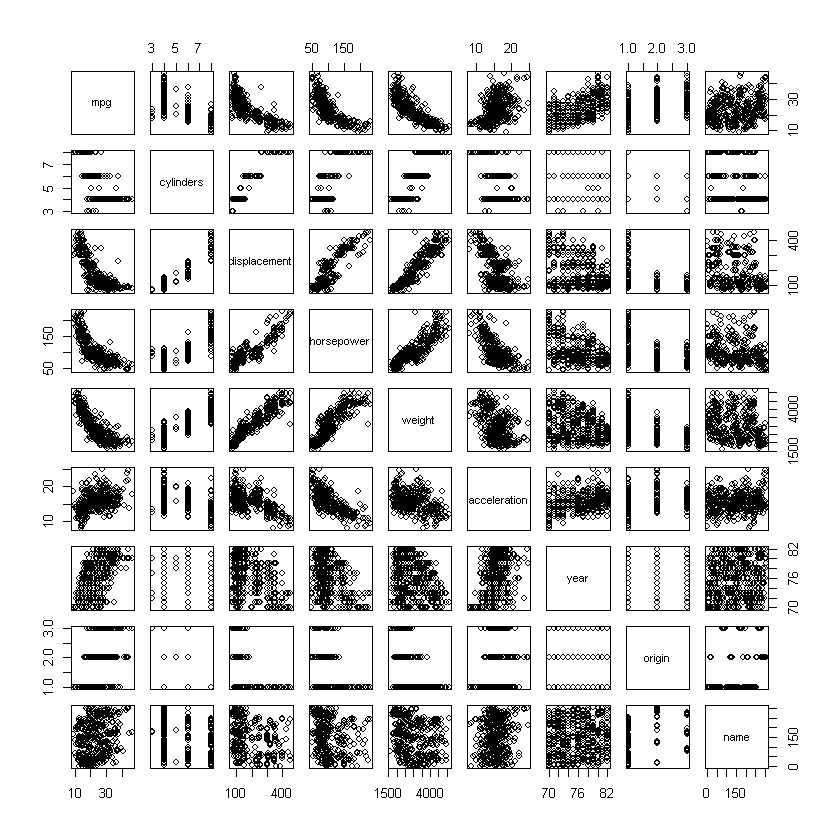

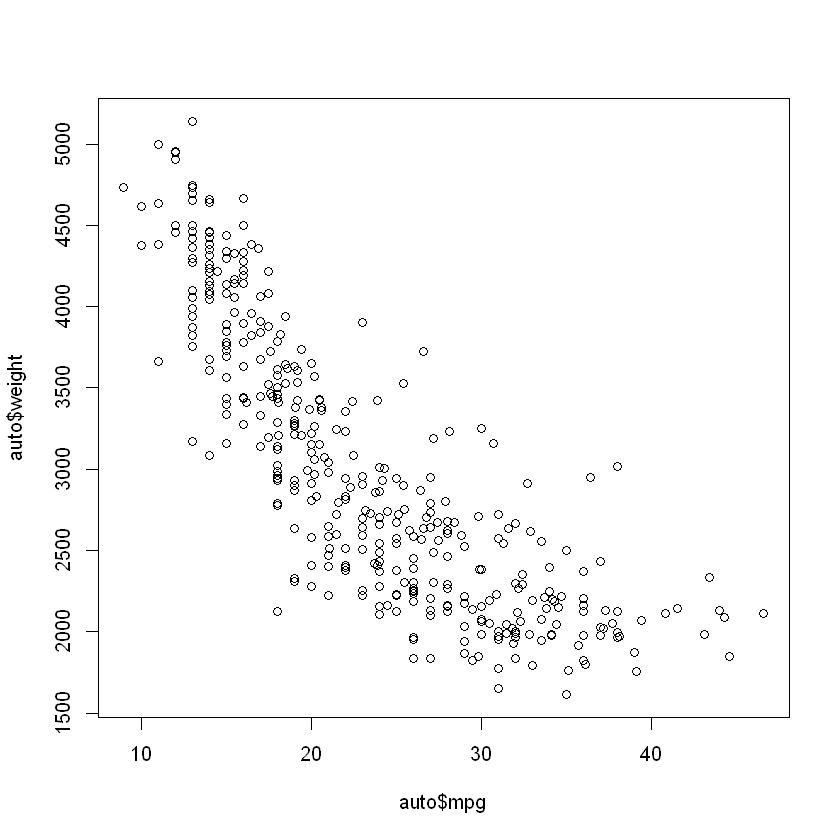

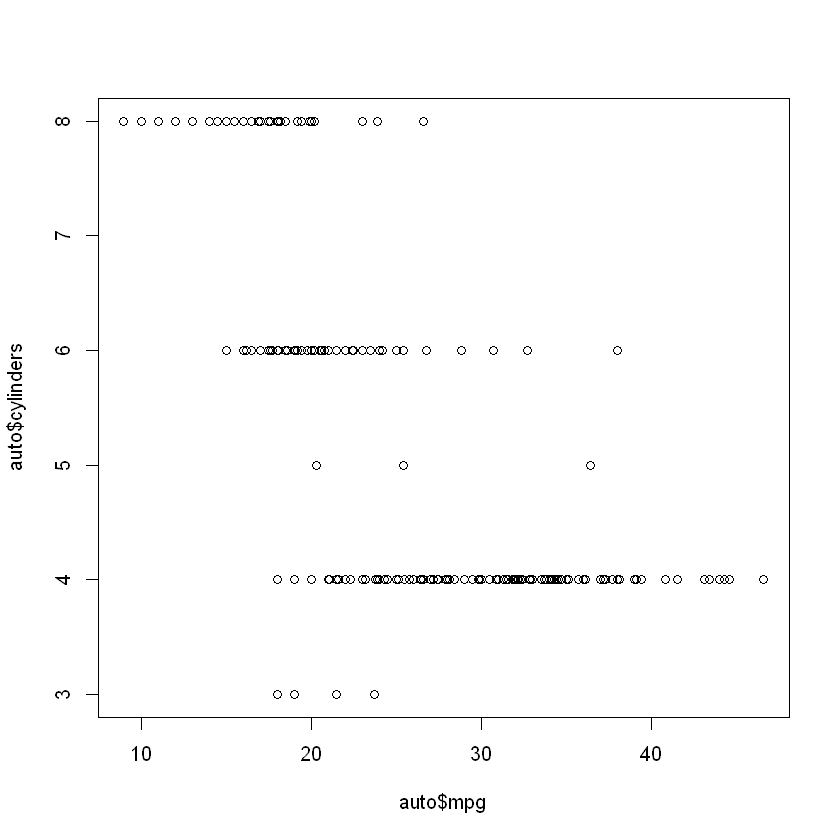

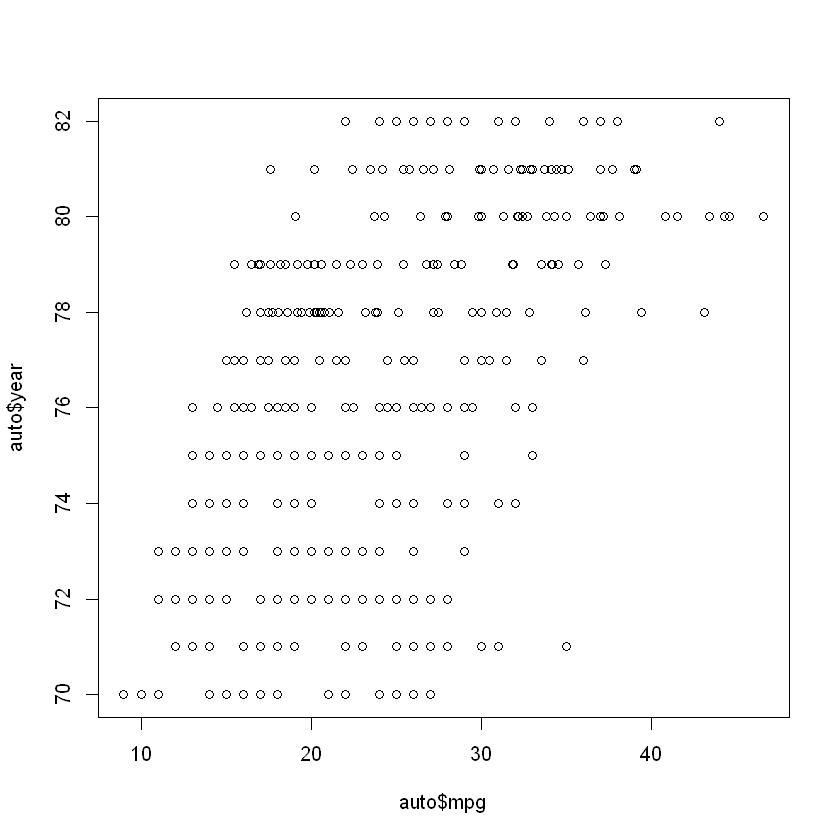

In [28]:
pairs(auto)
plot(auto$mpg, auto$weight)
plot(auto$mpg, auto$cylinders)
plot(auto$mpg, auto$year)

Heavier weight correlates with lower mpg.
More cylinders, less mpg.
Cars become more efficient over time.

10. Now we look at the `Boston` housing data set

Load in the data, its in the `MASS` library. How many cols/rows does it have, what do they represent?

In [30]:
install.packages("MASS")
library(MASS)
boston <- Boston
dim(boston)
?Boston

Installing package into 'C:/Users/jfields/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

Warning message:
"package 'MASS' is in use and will not be installed"


[1] 506  14

In [ ]:
Make some pairwise plots of the data

In [ ]:
plot(boston$age, boston$crim)
plot(boston$dis, boston$crim)
plot(boston$rad, boston$crim)
plot(boston$tax, boston$crim)
plot(boston$ptratio, boston$crim)

Older homes, more crime. Closer to work-area, more crime. Higher index of accessibility to radial highways, more crime. Higher tax rate, more crime. Higher pupil:teacher ratio, more crime.

Are any of the predictors associated with per capita crime rate?

In [31]:
install.packages("corrr")
library(corrr)
boston %>% correlate() %>% focus(crim)

Installing package into 'C:/Users/jfields/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

Warning message:
"package 'corrr' is in use and will not be installed"

Correlation method: 'pearson'
Missing treated using: 'pairwise.complete.obs'




rowname,crim
<chr>,<dbl>
zn,-0.20046922
indus,0.40658341
chas,-0.05589158
nox,0.42097171
rm,-0.21924670
age,0.35273425
dis,-0.37967009
rad,0.62550515
tax,0.58276431


`rad` and `tax` have the highest positive correlation.

Do any suburbs have particularly high crime rates? Tax rates? Pupil-teacher ratios?

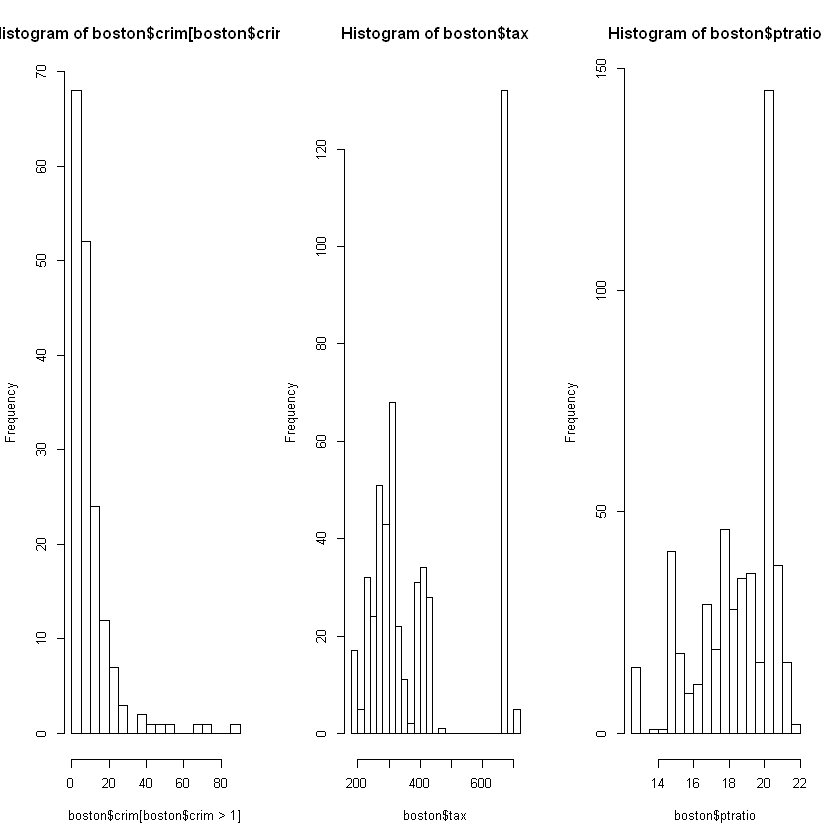

In [32]:
par(mfrow=c(1,3))
hist(boston$crim[boston$crim > 1], breaks=25)
hist(boston$tax, breaks=25)
hist(boston$ptratio, breaks=25)

Most cities have low crime rates, but there is a long tail: 18 suburbs appear to have a crime rate > 20, reaching to above 80.

There is a large divide between suburbs with low tax rates and a peak at 660-680

A skew towards high ratios, but no particularly high ratios.

How many of the suburbs in this data set bound the Charles river?

In [33]:
dim(subset(boston, chas == 1))

[1] 35 14

What's the median pupil-teacher ratio?

In [34]:
median(boston$ptratio)

[1] 19.05

Which suburb has the lowest median value of owner-occupied homes?

In [35]:
t(subset(boston, medv == min(Boston$medv)))

,399,406
crim,38.3518,67.9208
zn,0.0000,0.0000
indus,18.1000,18.1000
chas,0.0000,0.0000
nox,0.6930,0.6930
rm,5.4530,5.6830
age,100.0000,100.0000
dis,1.4896,1.4254
rad,24.0000,24.0000
tax,666.0000,666.0000


How many suburbs average more than 7 rooms per dwelling? 8?

In [36]:
dim(subset(boston, rm > 7))
dim(subset(boston, rm > 8))

[1] 64 14

[1] 13 14

In [37]:
summary(subset(boston, rm > 8))
summary(boston)

      crim               zn            indus             chas       
 Min.   :0.02009   Min.   : 0.00   Min.   : 2.680   Min.   :0.0000  
 1st Qu.:0.33147   1st Qu.: 0.00   1st Qu.: 3.970   1st Qu.:0.0000  
 Median :0.52014   Median : 0.00   Median : 6.200   Median :0.0000  
 Mean   :0.71879   Mean   :13.62   Mean   : 7.078   Mean   :0.1538  
 3rd Qu.:0.57834   3rd Qu.:20.00   3rd Qu.: 6.200   3rd Qu.:0.0000  
 Max.   :3.47428   Max.   :95.00   Max.   :19.580   Max.   :1.0000  
      nox               rm             age             dis       
 Min.   :0.4161   Min.   :8.034   Min.   : 8.40   Min.   :1.801  
 1st Qu.:0.5040   1st Qu.:8.247   1st Qu.:70.40   1st Qu.:2.288  
 Median :0.5070   Median :8.297   Median :78.30   Median :2.894  
 Mean   :0.5392   Mean   :8.349   Mean   :71.54   Mean   :3.430  
 3rd Qu.:0.6050   3rd Qu.:8.398   3rd Qu.:86.50   3rd Qu.:3.652  
 Max.   :0.7180   Max.   :8.780   Max.   :93.90   Max.   :8.907  
      rad              tax           ptratio          b

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 